# Réseau CNN pour le MNIST avec Keras

On import d'abord ce qu'il faut.

In [9]:
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Flatten

from keras.datasets import mnist

On importe les données du MNSIT et on les met en forme pour Keras.

In [7]:
# Load training and eval data
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

On crée un modèle.

Le modèle est séquentiel : une couche après l'autre.
On ajoute les couches dans l'ordre.

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Le modèle doit être compilé avant d'être entrainé et utilisé.

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

On entraîne le réseau.

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.2681 - acc: 0.9172 - val_loss: 0.0583 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0900 - acc: 0.9728 - val_loss: 0.0395 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0653 - acc: 0.9805 - val_loss: 0.0338 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.0548 - acc: 0.9836 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.0483 - acc: 0.9854 - val_loss: 0.0290 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.0406 - acc: 0.9878 - val_loss: 0.0283 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.0385 - acc: 0.9886 - val_loss: 0.0260 -

On évalue le réseau.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027154922153297956
Test accuracy: 0.9913


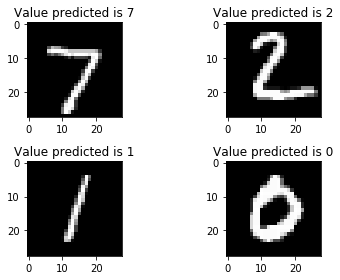

In [26]:
for i in range(4):
    predicted = model.predict(np.array([x_test[i]]), batch_size=1).argmax()
    plt.subplot(2, 2, i+1)
    plt.title("Value predicted is {}".format(predicted))
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap='gray')
plt.tight_layout()